accuracy score = 0.8283582089552238
mean squared error = 0.17164179104477612
precision score = 0.8732394366197183
recall score = 0.6262626262626263
confusion matrix = 
[[160   9]
 [ 37  62]]
f1 score = 0.7294117647058824


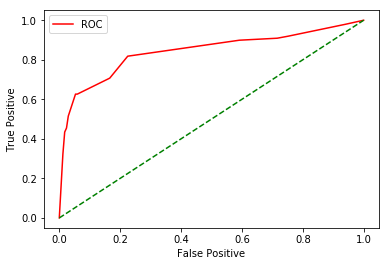

AUC = 0.8411332257486103


In [71]:
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import display,Image
import matplotlib.pyplot as plt

f = open(r"../titanic.csv")
train = pd.read_csv(f)
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

age_median = np.nanmedian(train["Age"])
new_Age = np.where(train["Age"].isnull(), age_median, train["Age"])
train["Age"] = new_Age

label_encoder = preprocessing.LabelEncoder()
train["Sex"] = label_encoder.fit_transform(train["Sex"])
train["Embarked"] = label_encoder.fit_transform(train["Embarked"])

X = titanic_train.drop('Survived', axis = 1)

train_x, test_x, train_y, test_y = train_test_split(X, train["Survived"], test_size = 0.3)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 5, random_state=0)
titanic_clf = clf.fit(train_x,train_y)
test_y_predicted = titanic_clf.predict(test_x)

# 評量模型

# accuracy
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print("accuracy score = " + str(accuracy))

# mean squared error
mse = metrics.mean_squared_error(test_y, test_y_predicted)
print("mean squared error = " + str(mse))

# precision
pre = metrics.precision_score(test_y, test_y_predicted)
print("precision score = " + str(pre))

# recall
recall = metrics.recall_score(test_y, test_y_predicted)
print("recall score = " + str(recall))

# 混淆矩陣 
# [[true_neg false_neg] [false_pos true_pos]]
cm = metrics.confusion_matrix(test_y, test_y_predicted)
print("confusion matrix = \n" + str(cm))

f1 = metrics.f1_score(test_y, test_y_predicted)
print("f1 score = " + str(f1))

# ROC曲線
#預測出各結果的機率
prob = clf.predict_proba(test_x)
# 取1, 代表活著的, 所有乘客生還機率
prob = prob[:, 1]
fper, tper, thresholds = metrics.roc_curve(test_y, prob)
plt.plot(fper, tper, color = 'red', label = 'ROC')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.plot([0, 1], [0, 1], color = 'green', linestyle = '--')
# 左上角的圖例
plt.legend()
plt.show()

#AUC
roc_auc = metrics.auc(fper, tper)
print("AUC = " + str(roc_auc))